In [1]:
import scipy.io
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

In [ ]:
bc = scipy.io.loadmat('BC.mat')['BC']

array([[[ 4.53968945e-02,  4.53968945e-02,  1.45909300e-01,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  1.84458769e+00,  1.00000000e+00,  1.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  2.49594210e+00,  0.00000000e+00,  0.00000000e+00, -1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.79919080e+00, -1.79919080e+00,  1.45909300e-01,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.79919080e+00,  4.53968945e-02,  2.49594210e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.84458769e-01, -1.00000000e+00,  1.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00, -1.17501640e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000

In [79]:
bc[0] += bc[1]
bc

array([[[ 4.53968945e-02,  4.53968945e-02,  1.45909300e-01,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  1.84458769e+00,  1.00000000e+00,  1.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  2.43484125e+00,  0.00000000e+00,  0.00000000e+00, -1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.79919080e+00, -1.79919080e+00,  1.45909300e-01,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.79919080e+00,  4.53968945e-02,  2.43484125e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.84458769e-01, -1.00000000e+00,  1.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00, -1.17501640e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000

In [3]:
cyl = bc[0,0,:]
cyl

array([0.04539689, 0.04539689, 0.1459093 , 0.        , 0.        , 1.        , 1.84458769, 1.        , 1.        ])

In [4]:
points = np.loadtxt("data_particle.dat")

In [5]:
def ProjectPointsToCylinder(points,cyl):
    point_to_cyl_origin = points-cyl[:3]
    cyl_axis = cyl[3:6]
    cyl_radius = cyl[6]
    cyl_axis /= np.linalg.norm(cyl_axis)

    axis_projection = np.expand_dims(np.dot(point_to_cyl_origin,cyl_axis),1)*cyl_axis
    axis_projection += cyl[:3]
    axis_projection_to_points = points-axis_projection
    axis_projection_to_points_scaled = axis_projection_to_points/np.linalg.norm(axis_projection_to_points,axis=1,keepdims=True)*cyl_radius
    point_on_wall = axis_projection+axis_projection_to_points_scaled
    return point_on_wall

In [6]:
point_on_wall = ProjectPointsToCylinder(points,cyl)

In [7]:
from Plotting import Plot3DVectors
#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
#Plot3DVectors(ax,axis_projection,s)

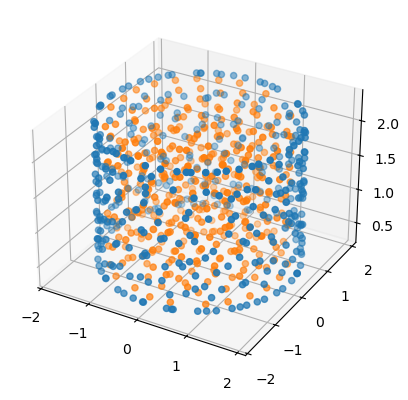

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
vector = point_on_wall
x = vector[:,0]
y = vector[:,1]
z = vector[:,2]
ax.scatter(x,y,z)
vector = points
x = vector[:,0]
y = vector[:,1]
z = vector[:,2]
ax.scatter(x,y,z)

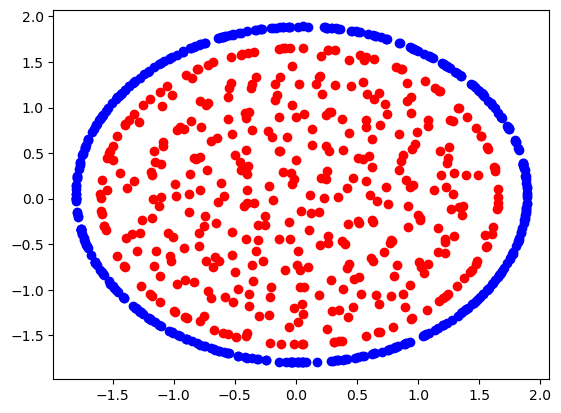

In [9]:
vector = point_on_wall
x = vector[:,0]
y = vector[:,1]
z = vector[:,2]
plt.plot(x,y,'o',color='b')
vector = points
x = vector[:,0]
y = vector[:,1]
z = vector[:,2]
plt.plot(x,y,'o',color='r')